In [3]:
pip install tensorflow keras split-folders opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
import random


In [49]:
input_folder='/Users/HP/Downloads/Agricultural-crops'
output_folder='/Users/HP/Downloads/ImageRecognition'

split_ratio = (0.8, 0.1, 0.1)
splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None
)

Copying files: 829 files [00:03, 271.72 files/s]


In [62]:
image_size=(224,224)
batch_size=32

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [63]:
# Data augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
#Data augmentation for validation data (only rescaling) 
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [64]:
import os
train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder,'val')
test_dir = os.path.join(output_folder, 'test')

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)
valid_data =valid_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


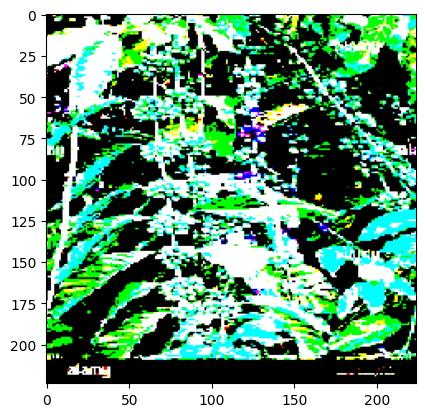

In [65]:
# Get a batch of images and labels
images, labels = next(valid_data)
# Select a raitiom image from the batch
idx = random.randint(0, images.shape[0] - 1)
# Display the image
plt.imshow( images [idx] )
plt.show()

In [66]:
from keras.applications.resnet import ResNet50

# Define the input shape based on img_size
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional base
base_model.trainable = False


In [67]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout (0.5),
    layers.Dense(30, activation='softmax')
])

In [68]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.0495 - loss: 3.8378 - val_accuracy: 0.2500 - val_loss: 2.6824
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.2072 - loss: 2.8608 - val_accuracy: 0.4444 - val_loss: 2.1815
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.3003 - loss: 2.4839 - val_accuracy: 0.6111 - val_loss: 1.8146
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4096 - loss: 2.0733 - val_accuracy: 0.5694 - val_loss: 1.5167
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4125 - loss: 2.0100 - val_accuracy: 0.6944 - val_loss: 1.1586
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5296 - loss: 1.6588 - val_accuracy: 0.7500 - val_loss: 1.1346
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5856 - loss: 1.3994 - val_accuracy: 0.7222 - val_loss: 1.0747
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6092 - loss: 1.3377 - val_accuracy: 0.7361 - val_loss:

In [70]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7572 - loss: 0.8571
Test Accuracy: 75.24%


In [71]:
class_names = {
    0: 'Cherry',
    1: 'Coffee-plant',
    2: 'Cucumber',
    3: 'Fox nut (Makhana)',
    4: 'Lemon',
    5: 'Olive tree',
    6: 'Pearl millet (Bajra)',
    7: 'Tobacco plant',
    8: 'Almond',
    9: 'Banana',
    10: 'Cardamom',
    11: 'Chilli',
    12: 'Clove',
    13: 'Coconut',
    14: 'Cotton',
    15: 'Gram',
    16: 'Jowar',
    17: 'Jute',
    18: 'Maize',
    19: 'mustard-oil',
    20: 'papaya',
    21: 'pineapple',
    22: 'rice',
    23: 'soyabean',
    24: 'sugarcane',
    25: 'sunflower',
    26: 'tea',
    27: 'tomato',
    28: 'vigna-radiant(Mung)',
    29: 'wheat'
}


In [72]:
def predict_img (image, model):
    test_img=cv2.imread(image)
    test_img=cv2.resize(test_img, (224,224))
    test_img=np.expand_dims(test_img, axis=0)
    result=model.predict(test_img)
    r=np.argmax(result)
    print(class_names[r])

In [73]:
predict_img('/Users/HP/Downloads/ImageRecognition/test/jowar/image (3).jpeg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Jowar


In [75]:
predict_img('/Users/HP/Downloads/ImageRecognition/test/Tobacco-plant/images24.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Tobacco plant


In [76]:
model.save('CropModel.keras')